In [1]:
fits_url = 'https://archive.stsci.edu/missions/tess/tid/s0020/0000/0020/5171/7158/tess2019357164649-s0020-0000002051717158-0165-s_tp.fits'

In [3]:
import lightkurve as lk

In [4]:
result = lk.search_targetpixelfile(fits_url, mission='TESS')

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


Could not resolve https://archive.stsci.edu/missions/tess/tid/s0020/0000/0020/5171/7158/tess2019357164649-s0020-0000002051717158-0165-s_tp.fits to a sky position.


In [5]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [6]:
fits.info(fits_url)

Filename: C:\Users\jerobado\.astropy\cache\download\py3\db757dd63eab57d568ea3b85c984591e
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  PIXELS        1 BinTableHDU    248   18954R x 11C   [D, E, J, 121J, 121E, 121E, 121E, 121E, J, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
  3  TARGET COSMIC RAY    1 BinTableHDU     27   0R x 4C   [J, I, I, E]   


In [7]:
fits.getdata(fits_url, ext=1).columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '121J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(11,11)'
    name = 'FLUX'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_ERR'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_BKG'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_BKG_ERR'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'POS_CORR1'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'POS_CORR2'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
)

In [9]:
with fits.open(fits_url, mode="readonly") as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    raw_counts = hdulist[1].data['RAW_CNTS']
    calibrated_fluxes = hdulist[1].data['FLUX']

In [10]:
print(type(calibrated_fluxes))
print(calibrated_fluxes.shape)

<class 'numpy.ndarray'>
(18954, 11, 11)


In [13]:
calibrated_fluxes.shape

(18954, 11, 11)

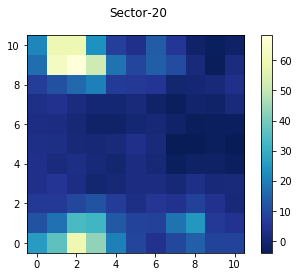

In [15]:
fig, ax = plt.subplots()

# Display the calibrated fluxes as an image for the fifth cadence.
cax = ax.imshow(calibrated_fluxes[4,:,:], cmap=plt.cm.YlGnBu_r, origin="lower")

# Let's define a title for the figure.
fig.suptitle("Sector-20")

# Add a color bar.
cbar = fig.colorbar(cax)
plt.show()

In [16]:
with fits.open(fits_url, mode="readonly") as hdulist:
    aperture = hdulist[2].data

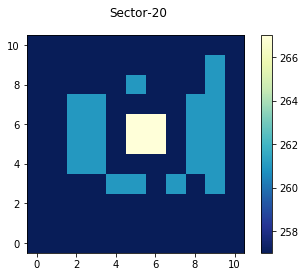

In [18]:
# Start figure and axis.
fig, ax = plt.subplots()

# Display the pixels as an image.
cax = ax.imshow(aperture, cmap=plt.cm.YlGnBu_r, origin="lower")

# Add a color bar.
cbar = fig.colorbar(cax)

# Add a title to the plot.
fig.suptitle("Sector-20")
plt.show()

In [19]:
bits = np.binary_repr(267)
print(bits)

100001011


In [20]:
# Create an array that will keep track of which pixels have a bitmask
# value of 2 set. To start, everything is set to 0 = not set.  We make it
# the same dimension as the aperture pixel table, for clarity.
bitmask2_set = np.zeros(aperture.shape)

# Identify which pixels have the bit mask value of 2 set.  We'll first
# loop over each row (i) in the 11x11 table, and then each column (j).
for i,row in enumerate(aperture):
    for j, pix in enumerate(row):

        # Get the bitmask as a string of zeros and ones.
        this_bitmask = np.binary_repr(pix)

        # Is the bitmask value of 2 set?  If so, the 2nd integer from the
        # right should be set to 1.  We'll use Python negative indexes to
        # access the second integer from the right.
        if this_bitmask[-2] == '1':
            
            # Then record this pixel as having a bitmask value of 2 set.
            bitmask2_set[i,j] = 1

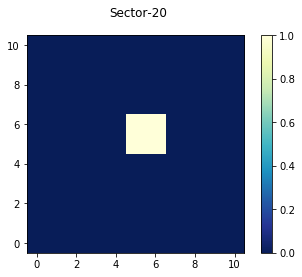

In [21]:
# Start figure and axis.
fig, ax = plt.subplots()

# Display, as an image, the 11x11 table that records the bitmask value of 2 being set.
cax = ax.imshow(bitmask2_set, cmap=plt.cm.YlGnBu_r, origin="lower")

# Add a color bar.
cbar = fig.colorbar(cax)

# Add a title to the plot.
fig.suptitle("Sector-20")
plt.show()

In [22]:
f = fits.open(fits_url)

In [23]:
f

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x00000183CA949708>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000183CA96E4C8>, <astropy.io.fits.hdu.image.ImageHDU object at 0x00000183CA96FAC8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000183CA973948>]

In [26]:
from astropy.wcs import WCS

In [25]:
wcs

<module 'astropy.wcs' from 'C:\\Users\\jerobado\\Anaconda3\\lib\\site-packages\\astropy\\wcs\\__init__.py'>

In [27]:
WCS

astropy.wcs.wcs.WCS

In [28]:
w = WCS(f[1].header)

In [29]:
lon, lat = w.wcs_pix2world(100., 100., 1)

In [30]:
print(lon, lat)

100.0 100.0


In [31]:
w

WCS Keywords

Number of WCS axes: 2
CTYPE : ''  ''  
CRVAL : 0.0  0.0  
CRPIX : 0.0  0.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 1.0  1.0  
NAXIS : 2448  18954

In [32]:
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename

In [33]:
f

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x00000183CA949708>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000183CA96E4C8>, <astropy.io.fits.hdu.image.ImageHDU object at 0x00000183CA96FAC8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000183CA973948>]

In [34]:
fits.open(f)[0]
wcs = WCS(hdu.header)

TypeError: stat: path should be string, bytes, os.PathLike or integer, not method

In [35]:
from astropy.utils.data import get_pkg_data_filename

In [36]:
f = fits.open(fits_url)

In [40]:
hdu = fits.open(fits_url)[0]
wcs = WCS(hdu.header)

TypeError: Image data of dtype object cannot be converted to float

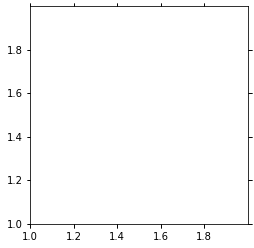

In [41]:
fig = plt.figure()
fig.add_subplot(111, projection=wcs)
plt.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
plt.xlabel('RA')
plt.ylabel('Dec')